# Universidad del Tolima                                                   
## Facultad de Ingeniería Forestal 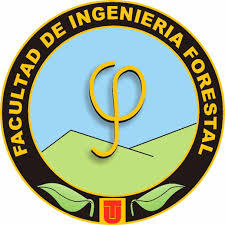
## Curso de hidrogeología y modelación de aguas subterráneas
## Unidad 1
## Práctico 2
## Modelacion de la interacción entre aguas superficiales y
## aguas subterráneas (SFR - Streamflow-Routing Package)

##Preparado por [Dr. Ing. Cristian Guevara-Ochoa]




# SFR package example
Demonstrates functionality of Flopy SFR module using the example

#### Problem description:

* Grid dimensions: 1 Layer, 15 Rows, 10 Columns
* Stress periods: 1 steady
* Flow package: LPF
* Stress packages: SFR, GHB, EVT, RCH
* Solver: SIP
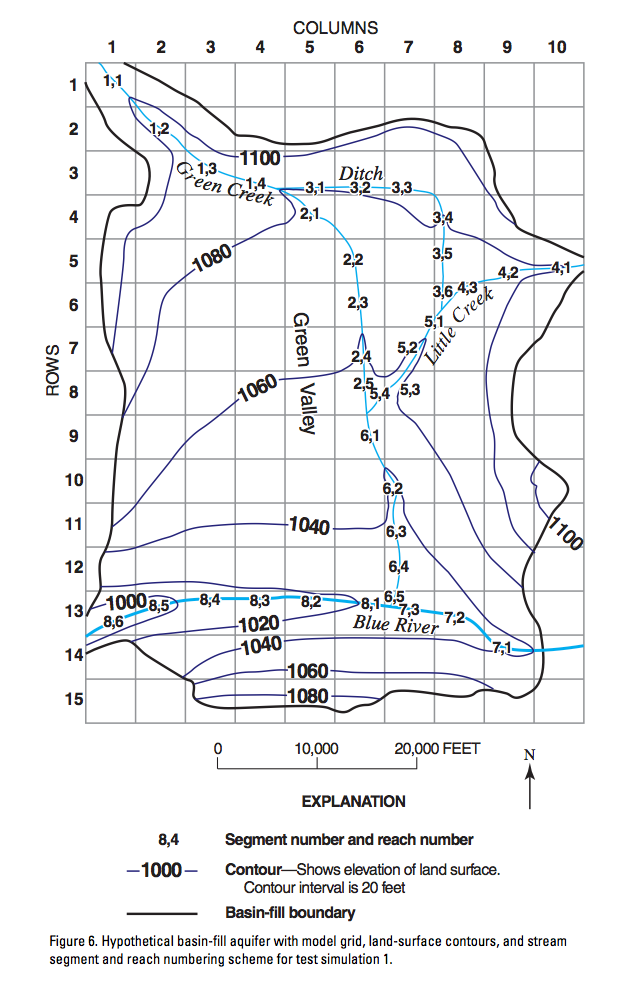


In [ ]:
Celda 1: Instala pymake desde GitHub y flopy para trabajar con modelos MODFLOW

In [ ]:
!pip install git+https://github.com/modflowpy/pymake.git@90bcc5d48c758b73c10798968bda6b07ccec0009
!pip install flopy

  Cloning https://github.com/modflowpy/pymake.git (to revision 90bcc5d48c758b73c10798968bda6b07ccec0009) to /tmp/pip-req-build-q72m_xa6
  Running command git clone --filter=blob:none --quiet https://github.com/modflowpy/pymake.git /tmp/pip-req-build-q72m_xa6
  Running command git rev-parse -q --verify 'sha^90bcc5d48c758b73c10798968bda6b07ccec0009'
  Running command git fetch -q https://github.com/modflowpy/pymake.git 90bcc5d48c758b73c10798968bda6b07ccec0009
  Running command git checkout -q 90bcc5d48c758b73c10798968bda6b07ccec0009
  Resolved https://github.com/modflowpy/pymake.git to commit 90bcc5d48c758b73c10798968bda6b07ccec0009
  Preparing metadata (setup.py) ... done
  Created wheel for pymake: filename=pymake-1.1.0-py3-none-any.whl size=37975 sha256=0e176a2791298f53d64f2d713b34e1963e0ff80f317636cdaaf255e532c83a18
  Stored in directory: /root/.cache/pip/wheels/a1/02/1c/c3a849e57dd362adf5a76aa83f615012c7018c3af345695da8
Successfully built pymake
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
Celda 2: Compila el ejecutable mf2005 usando pymake.

In [ ]:
import pymake
pymake.build_apps('mf2005')

mf2005 will be built for the "linux" operating system

mf2005 will be placed in the directory:
    "."

mf2005 will be built using "single" precision floats.

mf2005 will be built as a "release" application.

mf2005 fortran code will be built with "gfortran".
mf2005 c/c++ code will be built with "gcc".

mf2005 will use the following predefined syslibs:
    -lc

mf2005 will be built for "intel64" architecture.

downloading file:         True
verified download:        True
download timeout:         30 sec.
cleaning extracted files: True

extra files are not being read

Attempting to download the file:
    https://water.usgs.gov/water-resources/software/MODFLOW-2005/MF2005.1_12u.zip
 download attempt: 1
   file size: 6,585,179 bytes
     downloaded   204,800 bytes of 6,585,179 bytes (   3.1100%)
     downloaded   409,600 bytes of 6,585,179 bytes (   6.2200%)
     downloaded   614,400 bytes of 6,585,179 bytes (   9.3300%)
     downloaded   819,200 bytes of 6,585,179 bytes (  12.4401%)
    

0

In [ ]:

Celda 3: Importa módulos para manejar archivos, directorios y operaciones temporales.

In [ ]:
import glob
import os
import shutil
import sys
from pprint import pformat
from tempfile import TemporaryDirectory

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 4: Importa bibliotecas para gráficos, operaciones numéricas y manipulación de datos.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 4: Importa flopy y módulos para manejar archivos binarios y de flujo superficial.

In [ ]:
import flopy
import flopy.utils.binaryfile as bf
from flopy.utils.sfroutputfile import SfrFile

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
mpl.rcParams["figure.figsize"] = (11, 8.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 5: Muestra las versiones de Python, numpy, pandas, matplotlib y flopy.

In [ ]:
print(sys.version)
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {mpl.__version__}")
print(f"flopy version: {flopy.__version__}")
# -

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.8.0
flopy version: 3.8.2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 6: Define el nombre del ejecutable de MODFLOW como mf2005.

In [ ]:
# Set name of MODFLOW exe
#  assumes executable is in users path statement
exe_name = "mf2005"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### copy over the example files to the working directory

In [ ]:
Celda 7: Copia archivos de ejemplo a un directorio temporal.

In [ ]:
# temporary directory
temp_dir = TemporaryDirectory()
path = temp_dir.name

gpth = os.path.join("..", "..", "examples", "data", "mf2005_test", "test1ss.*")
for f in glob.glob(gpth):
    shutil.copy(f, path)
gpth = os.path.join("..", "..", "examples", "data", "mf2005_test", "test1tr.*")
for f in glob.glob(gpth):
    shutil.copy(f, path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Load example dataset, skipping the SFR package

In [ ]:
Celda 8: Carga el modelo MODFLOW con paquetes específicos.

In [ ]:
m = flopy.modflow.Modflow.load(
    "test1ss.nam",
    version="mf2005",
    exe_name=exe_name,
    model_ws=path,
    load_only=["ghb", "evt", "rch", "dis", "bas6", "oc", "sip", "lpf"],
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FileNotFoundError: cannot find name file: /tmp/tmpuwgo6bra/test1ss.nam

In [ ]:

Celda 9: Accede a los datos de los periodos de estrés del paquete de control de salida.

In [ ]:
oc = m.oc
oc.stress_period_data

{(-1, -1): [],
 (0, 0): ['print budget', 'print head', 'save head', 'save budget']}

### Read pre-prepared reach and segment data into numpy recarrays using numpy.genfromtxt()
Reach data (Item 2 in the SFR input instructions), are input and stored in a numpy record array
https://numpy.org/doc/stable/reference/generated/numpy.recarray.html
This allows for reach data to be indexed by their variable names, as described in the SFR input instructions.

For more information on Item 2, see the Online Guide to MODFLOW:
<https://water.usgs.gov/nrp/gwsoftware/modflow2000/MFDOC/sfr.html>

In [ ]:
Celda 10: Carga los datos de los tramos  desde un archivo CSV.

In [ ]:
rpth = os.path.join(
    "..", "..", "examples", "data", "sfr_examples", "test1ss_reach_data.csv"
)
reach_data = np.genfromtxt(rpth, delimiter=",", names=True)
reach_data

array([(0.,  0., 0., 1., 1., 4500.), (0.,  1., 1., 1., 2., 7000.),
       (0.,  2., 2., 1., 3., 6000.), (0.,  2., 3., 1., 4., 5550.),
       (0.,  3., 4., 2., 1., 6500.), (0.,  4., 5., 2., 2., 5000.),
       (0.,  5., 5., 2., 3., 5000.), (0.,  6., 5., 2., 4., 5000.),
       (0.,  7., 5., 2., 5., 5000.), (0.,  2., 4., 3., 1., 5000.),
       (0.,  2., 5., 3., 2., 5000.), (0.,  2., 6., 3., 3., 4500.),
       (0.,  3., 7., 3., 4., 6000.), (0.,  4., 7., 3., 5., 5000.),
       (0.,  5., 7., 3., 6., 2000.), (0.,  4., 9., 4., 1., 2500.),
       (0.,  4., 8., 4., 2., 5000.), (0.,  5., 7., 4., 3., 3500.),
       (0.,  5., 7., 5., 1., 4000.), (0.,  6., 6., 5., 2., 5000.),
       (0.,  7., 6., 5., 3., 3500.), (0.,  7., 5., 5., 4., 2500.),
       (0.,  8., 5., 6., 1., 5000.), (0.,  9., 6., 6., 2., 5000.),
       (0., 10., 6., 6., 3., 5000.), (0., 11., 6., 6., 4., 5000.),
       (0., 12., 6., 6., 5., 2000.), (0., 13., 8., 7., 1., 5000.),
       (0., 12., 7., 7., 2., 5500.), (0., 12., 6., 7., 3., 500

### Segment Data structure
Segment data are input and stored in a dictionary of record arrays, which

In [ ]:
Celda 11: Carga los datos de segmentos desde un archivo CSV y muestra el valor de width1 del primer segmento.

In [ ]:
spth = os.path.join(
    "..", "..", "examples", "data", "sfr_examples", "test1ss_segment_data.csv"
)
ss_segment_data = np.genfromtxt(spth, delimiter=",", names=True)
segment_data = {0: ss_segment_data}
segment_data[0][0:1]["width1"]

array([0.])

### define dataset 6e (channel flow data) for segment 1
dataset 6e is stored in a nested dictionary keyed by stress period and segment,
with a list of the following lists defined for each segment with icalc == 4
FLOWTAB(1) FLOWTAB(2) ... FLOWTAB(NSTRPTS)
DPTHTAB(1) DPTHTAB(2) ... DPTHTAB(NSTRPTS)
WDTHTAB(1) WDTHTAB(2) ... WDTHTAB(NSTRPTS)

In [ ]:
Celda 12: Define los datos de flujo del canal en un diccionario.

In [ ]:
channel_flow_data = {
    0: {
        1: [
            [0.5, 1.0, 2.0, 4.0, 7.0, 10.0, 20.0, 30.0, 50.0, 75.0, 100.0],
            [0.25, 0.4, 0.55, 0.7, 0.8, 0.9, 1.1, 1.25, 1.4, 1.7, 2.6],
            [3.0, 3.5, 4.2, 5.3, 7.0, 8.5, 12.0, 14.0, 17.0, 20.0, 22.0],
        ]
    }
}

### define dataset 6d (channel geometry data) for segments 7 and 8
dataset 6d is stored in a nested dictionary keyed by stress period and segment,
with a list of the following lists defined for each segment with icalc == 4
FLOWTAB(1) FLOWTAB(2) ... FLOWTAB(NSTRPTS)
DPTHTAB(1) DPTHTAB(2) ... DPTHTAB(NSTRPTS)
WDTHTAB(1) WDTHTAB(2) ... WDTHTAB(NSTRPTS)

In [ ]:
Celda 13: Define los datos de geometría del canal en un diccionario.

In [ ]:
channel_geometry_data = {
    0: {
        7: [
            [0.0, 10.0, 80.0, 100.0, 150.0, 170.0, 240.0, 250.0],
            [20.0, 13.0, 10.0, 2.0, 0.0, 10.0, 13.0, 20.0],
        ],
        8: [
            [0.0, 10.0, 80.0, 100.0, 150.0, 170.0, 240.0, 250.0],
            [25.0, 17.0, 13.0, 4.0, 0.0, 10.0, 16.0, 20.0],
        ],
    }
}

### Define SFR package variables

In [ ]:
Celda 14: Define parámetros para el flujo superficial, incluyendo tramos, segmentos y configuraciones de salida.

In [ ]:
nstrm = len(reach_data)  # number of reaches
nss = len(segment_data[0])  # number of segments
nsfrpar = 0  # number of parameters (not supported)
nparseg = 0
const = 1.486  # constant for manning's equation, units of cfs
dleak = 0.0001  # closure tolerance for stream stage computation
ipakcb = 53  # flag for writing SFR output to cell-by-cell budget (on unit 53)
istcb2 = 81  # flag for writing SFR output to text file
dataset_5 = {0: [nss, 0, 0]}  # dataset 5 (see online guide)

### Instantiate SFR package
Input arguments generally follow the variable names defined in the Online Guide to MODFLOW

In [ ]:
Celda 15: Configura el paquete SFR2 para el flujo superficial en el modelo.

In [ ]:
sfr = flopy.modflow.ModflowSfr2(
    m,
    nstrm=nstrm,
    nss=nss,
    const=const,
    dleak=dleak,
    ipakcb=ipakcb,
    istcb2=istcb2,
    reach_data=reach_data,
    segment_data=segment_data,
    channel_geometry_data=channel_geometry_data,
    channel_flow_data=channel_flow_data,
    dataset_5=dataset_5,
    unit_number=15,
)

In [ ]:
Celda 16: Muestra los datos del primer tramo de flujo del paquete SFR2.

In [ ]:
sfr.reach_data[0:1]

rec.array([(0, 0, 0, 0, 1, 1, 4500., 0., 0., 0., 0., 0., 0., 0., 0., 1, 2)],
          dtype=[('node', '<i8'), ('k', '<i8'), ('i', '<i8'), ('j', '<i8'), ('iseg', '<i8'), ('ireach', '<i8'), ('rchlen', '<f4'), ('strtop', '<f4'), ('slope', '<f4'), ('strthick', '<f4'), ('strhc1', '<f4'), ('thts', '<f4'), ('thti', '<f4'), ('eps', '<f4'), ('uhc', '<f4'), ('reachID', '<i8'), ('outreach', '<i8')])

### Plot the SFR segments
any column in the reach_data array can be plotted using the ```key``` argument

In [ ]:
Celda 17: Visualiza los segmentos de flujo superficial del paquete SFR2.

[<Axes: title={'center': ' SFR iseg data stress period 1 layer 1'}>]

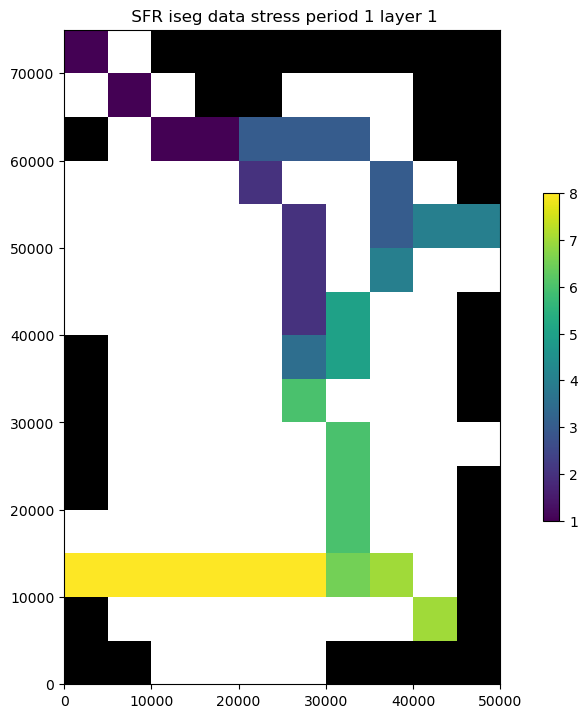

In [ ]:
sfr.plot(key="iseg")

### Check the SFR dataset for errors

In [ ]:

Celda 18: Verifica la configuración del paquete SFR2.

In [ ]:
chk = sfr.check()

passed.

Checking for continuity in segment and reach numbering...
passed.

Checking for increasing segment numbers in downstream direction...
passed.

Checking for circular routing...
passed.

Checking reach connections for proximity...
0 segments with non-adjacent reaches found.
At segments:


0 segments with non-adjacent reaches found.
At segments:



Checking for model cells with multiple non-zero SFR conductances...
3 model cells with multiple non-zero SFR conductances found.
This may lead to circular routing between collocated reaches.
Nodes with overlapping conductances:
k	i	j	iseg	ireach	rchlen	strthick	strhc1
0	7	5	2	5	5000.0	3.0	2.9999999242136255e-05
0	5	7	3	6	2000.0	2.0	2.9999999242136255e-05
0	5	7	4	3	3500.0	3.0	2.9999999242136255e-05
0	5	7	5	1	4000.0	3.0	2.9999999242136255e-05
0	7	5	5	4	2500.0	3.0	2.9999999242136255e-05
0	12	6	6	5	2000.0	3.0	2.9999999242136255e-05
0	12	6	7	3	5000.0	3.0	5.999999848427251e-05

Checking for streambed tops of less than -10...
strtop not speci

In [ ]:

Celda 19: Extrae solo los nombres de archivo de los archivos externos.

In [ ]:
m.external_fnames = [os.path.split(f)[1] for f in m.external_fnames]
m.external_fnames

['test1ss.sg1',
 'test1ss.sg2',
 'test1ss.sg3',
 'test1ss.sg4',
 'test1ss.sg5',
 'test1ss.sg6',
 'test1ss.sg7',
 'test1ss.sg8',
 'test1ss.dvsg9']

In [ ]:

Celda 20: Genera los archivos de entrada para la simulación del modelo.

In [ ]:
m.write_input()

In [ ]:
Celda 21: Ejecuta la simulación y verifica si fue exitosa.

In [ ]:
success, buff = m.run_model(silent=True, report=True)
assert success, pformat(buff)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'm' is not defined

### Load SFR formated water balance output into pandas dataframe using the `SfrFile` class

In [ ]:
Celda 23: Carga y muestra las primeras filas de los resultados de flujo superficia

In [ ]:
sfr_outfile = os.path.join(
    "..", "..", "examples", "data", "sfr_examples", "test1ss.flw"
)
sfrout = SfrFile(sfr_outfile)
df = sfrout.get_dataframe()
df.head()

,layer,row,column,segment,reach,Qin,Qaquifer,Qout,Qovr,Qprecip,Qet,stage,depth,width,Cond,gradient,kstpkper,k,i,j
0,1,1,1,1,1,25.0000,0.7923,24.2080,0.0,0.0,0.0,1094.22,1.174,12.98,0.5843,0.4520,"(0, 0)",0,0,0
1,1,2,2,1,2,24.2080,2.1408,22.0670,0.0,0.0,0.0,1089.21,1.152,12.68,0.8878,0.8038,"(0, 0)",0,1,1
2,1,3,3,1,3,22.0670,2.9909,19.0760,0.0,0.0,0.0,1083.53,1.110,12.13,0.7278,1.3700,"(0, 0)",0,2,2
3,1,3,4,1,4,19.0760,2.5538,16.5220,0.0,0.0,0.0,1078.47,1.064,11.32,0.6285,1.3550,"(0, 0)",0,2,3
4,1,4,5,2,1,6.5222,2.7058,3.8163,0.0,0.0,0.0,1072.40,0.469,12.00,0.7800,1.1560,"(0, 0)",0,3,4


#### Plot streamflow and stream/aquifer interactions for a segment

In [ ]:
Celda 24: Filtra y grafica los flujos para el segmento 3 del modelo SFR.

9     1
10    2
11    3
12    4
13    5
14    6
Name: reach, dtype: object


Text(0.5, 0, 'SFR reach')

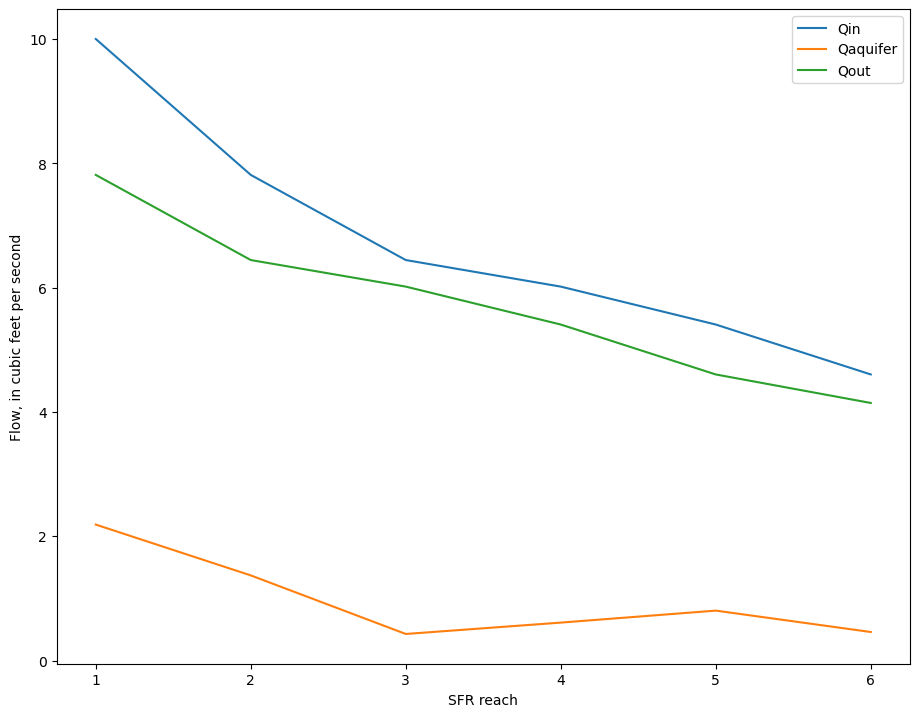

In [ ]:
inds = df.segment == 3
print(df.reach[inds].astype(str))
# ax = df.ix[inds, ['Qin', 'Qaquifer', 'Qout']].plot(x=df.reach[inds])
ax = df.loc[inds, ["reach", "Qin", "Qaquifer", "Qout"]].plot(x="reach")
ax.set_ylabel("Flow, in cubic feet per second")
ax.set_xlabel("SFR reach")

### Look at stage, model top, and streambed top

In [ ]:
Celda 25: Extrae las elevaciones del lecho del río para el segmento 3.

In [ ]:
streambed_top = m.sfr.segment_data[0][m.sfr.segment_data[0].nseg == 3][
    ["elevup", "elevdn"]
][0]
streambed_top

np.record((1075.0, 1060.0), dtype={'names': ['elevup', 'elevdn'], 'formats': ['<f4', '<f4'], 'offsets': [96, 132], 'itemsize': 160})

In [ ]:
Celda 26: Grafica las elevaciones del lecho del río y la superficie del modelo en función del tramo de flujo.

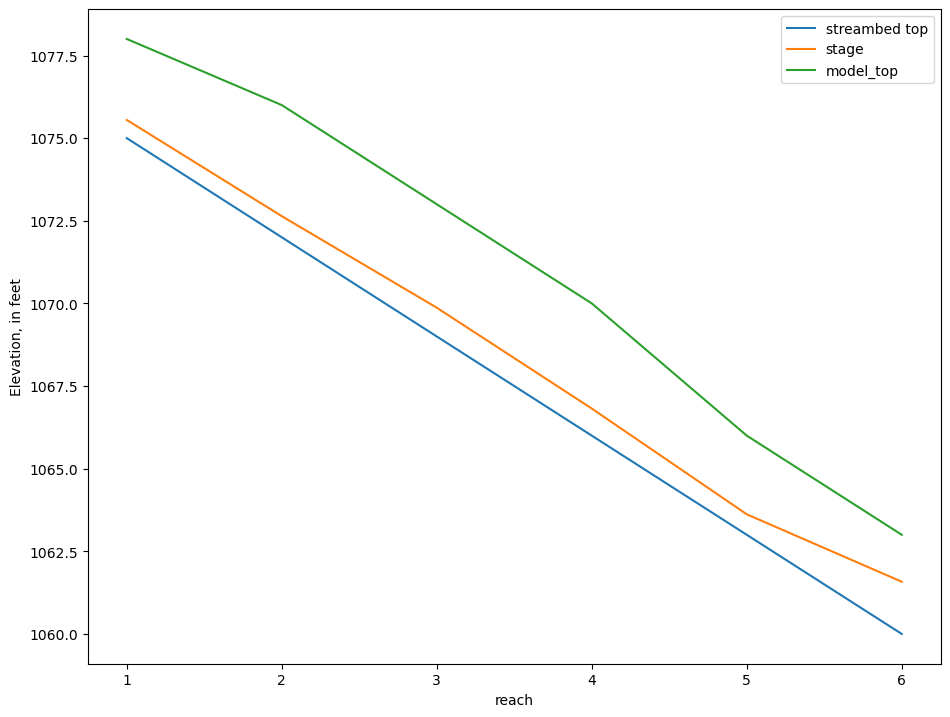

In [ ]:
df["model_top"] = m.dis.top.array[df.row.values - 1, df.column.values - 1]
fig, ax = plt.subplots()
plt.plot([1, 6], list(streambed_top), label="streambed top")
# ax = df.loc[inds, ['stage', 'model_top']].plot(ax=ax, x=df.reach[inds])
ax = df.loc[inds, ["reach", "stage", "model_top"]].plot(ax=ax, x="reach")
ax.set_ylabel("Elevation, in feet")
plt.legend()

### Get SFR leakage results from cell budget file

In [ ]:
Celda 27: Carga y muestra los encabezados del archivo de presupuesto de celdas.

In [ ]:
bpth = os.path.join(path, "test1ss.cbc")
cbbobj = bf.CellBudgetFile(bpth)
cbbobj.headers

,kstp,kper,text,ncol,nrow,nlay
36,1,1,STREAM LEAKAGE,10,15,1


In [ ]:

Celda 28: Extrae y limpia los datos de filtración del río, reemplazando los ceros por NaN.

In [ ]:
sfrleak = cbbobj.get_data(text="  STREAM LEAKAGE")[0]
sfrleak[sfrleak == 0] = np.nan  # remove zero values

### Plot leakage in plan view

In [ ]:
Celda 28: Visualiza los datos de filtración del río en un mapa de calor con barra de color.

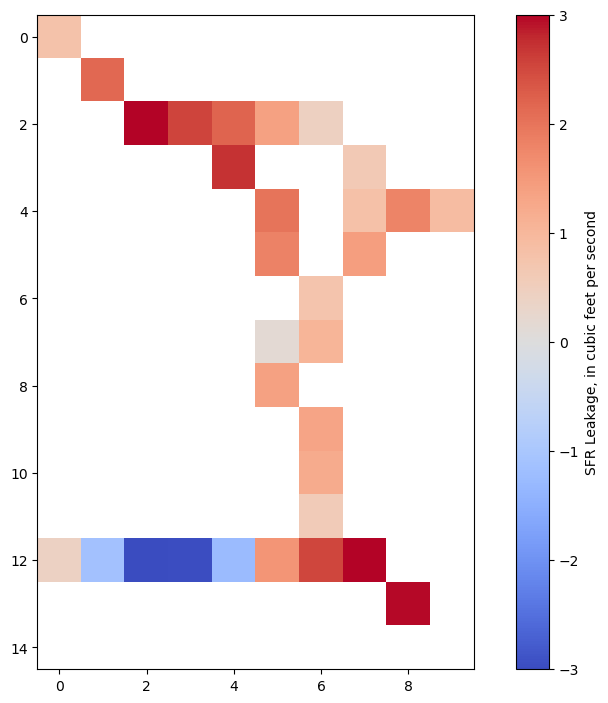

In [ ]:
im = plt.imshow(
    sfrleak[0], interpolation="none", cmap="coolwarm", vmin=-3, vmax=3
)
cb = plt.colorbar(im, label="SFR Leakage, in cubic feet per second")

### Plot total streamflow

In [ ]:
Celda 29: Modifica los datos de flujo superficial y los visualiza en un mapa de calor.

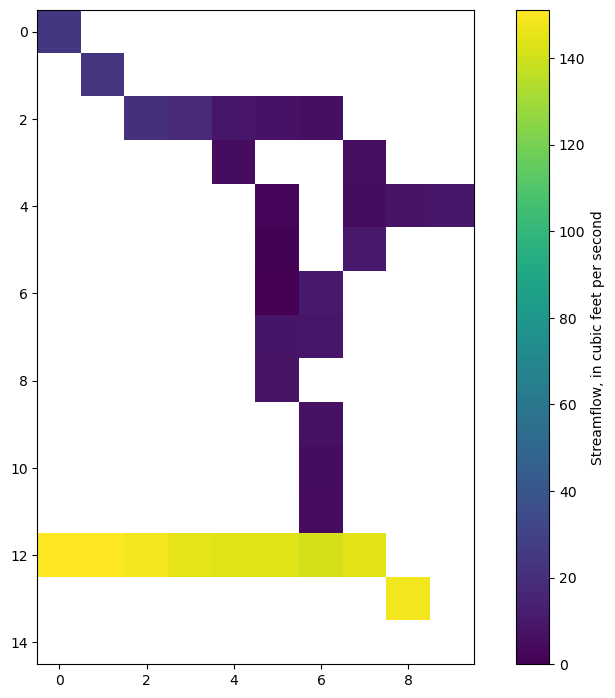

In [ ]:
sfrQ = sfrleak[0].copy()
sfrQ[sfrQ == 0] = np.nan
sfrQ[df.row.values - 1, df.column.values - 1] = (
    df[["Qin", "Qout"]].mean(axis=1).values
)
im = plt.imshow(sfrQ, interpolation="none")
plt.colorbar(im, label="Streamflow, in cubic feet per second")

## Reading transient SFR formatted output

The `SfrFile` class handles this the same way

Files for the transient version of the above example were already copied to the `data` folder in the third cell above.
First run the transient model to get the output:
```
>mf2005 test1tr.nam
```

In [ ]:
Celda 30: Ejecuta el modelo MODFLOW con el archivo de entrada especificado.

In [ ]:
flopy.run_model(exe_name, "test1tr.nam", model_ws=path, silent=True)

(True, [])

In [ ]:

Celda 31: Carga y muestra las primeras filas de los resultados de flujo superficial.

In [ ]:
sfrout_tr = SfrFile(os.path.join(path, "test1tr.flw"))
dftr = sfrout_tr.get_dataframe()
dftr.head()

,layer,row,column,segment,reach,Qin,Qaquifer,Qout,Qovr,Qprecip,Qet,stage,depth,width,Cond,gradient,kstpkper,k,i,j
0,1,1,1,1,1,25.0000,0.77759,24.2220,0.0,0.0,0.0,1094.22,1.1740,12.98,0.5843,0.4436,"(0, 0)",0,0,0
1,1,2,2,1,2,24.2220,2.21540,22.0070,0.0,0.0,0.0,1089.21,1.1510,12.68,0.8875,0.8321,"(0, 0)",0,1,1
2,1,3,3,1,3,22.0070,2.98700,19.0200,0.0,0.0,0.0,1083.53,1.1090,12.12,0.7270,1.3700,"(0, 0)",0,2,2
3,1,3,4,1,4,19.0200,2.54940,16.4710,0.0,0.0,0.0,1078.47,1.0630,11.31,0.6275,1.3540,"(0, 0)",0,2,3
4,1,4,5,2,1,6.4706,2.70370,3.7669,0.0,0.0,0.0,1072.40,0.4663,12.00,0.7800,1.1550,"(0, 0)",0,3,4


### plot a hydrograph
plot `Qout` (simulated streamflow) and `Qaquifer` (simulated stream leakage) through time

In [ ]:
Celda 32: Grafica el flujo de salida y la filtración al acuífero para el segmento 8 y tramo 5.

Text(0, 0.5, 'Leakage to aquifer, cfs')

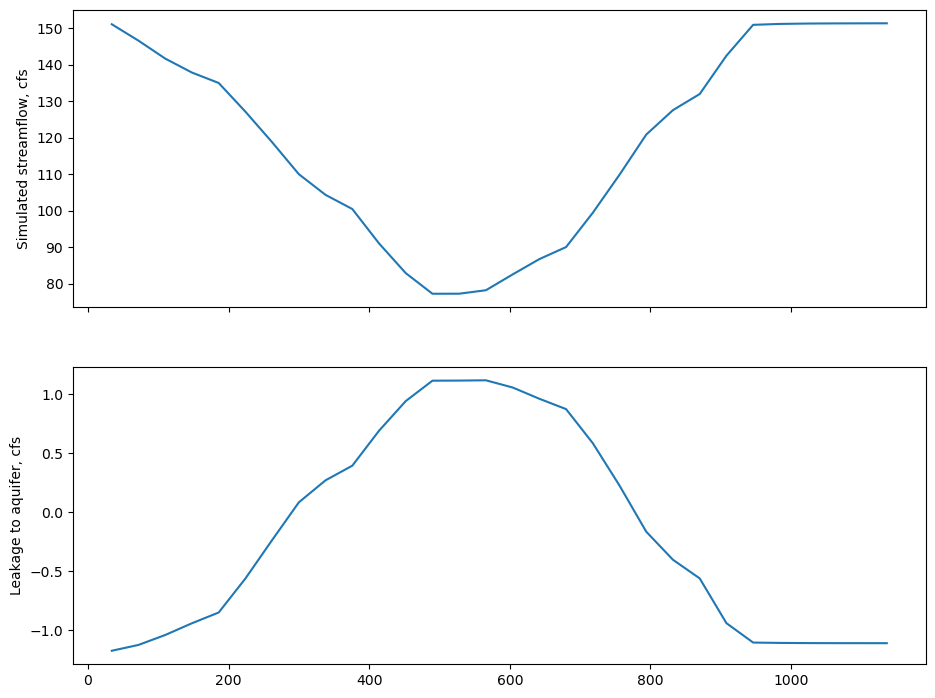

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True)
dftr8 = dftr.loc[(dftr.segment == 8) & (dftr.reach == 5)]
dftr8.Qout.plot(ax=axes[0])
axes[0].set_ylabel("Simulated streamflow, cfs")
dftr8.Qaquifer.plot(ax=axes[1])
axes[1].set_ylabel("Leakage to aquifer, cfs")

In [ ]:
try:
    # ignore PermissionError on Windows
    temp_dir.cleanup()
except:
    pass